In [11]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%inline%

UsageError: Line magic function `%inline%` not found.


In [2]:
df = pd.read_csv('.././creditcard.csv', sep=',')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


/Users/robvangastel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.
/Users/robvangastel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


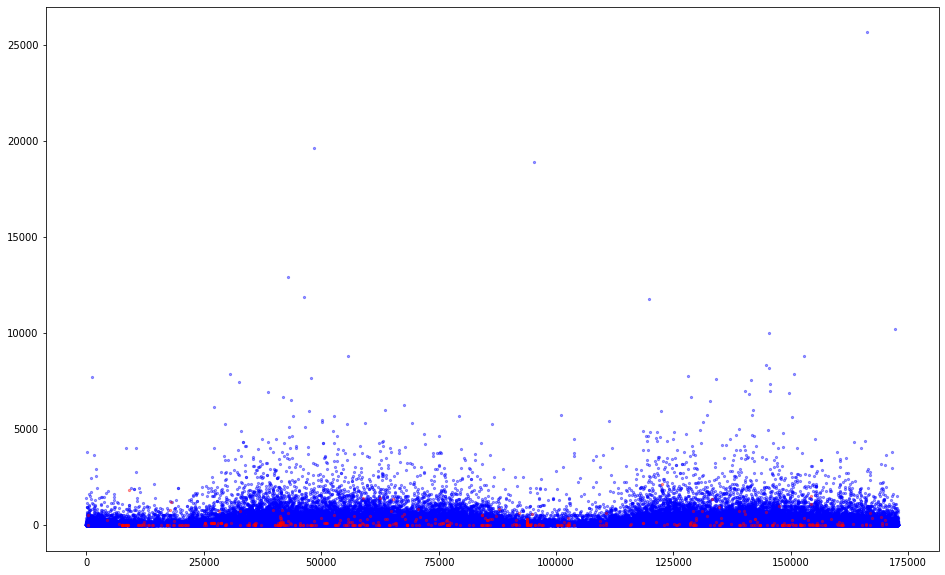

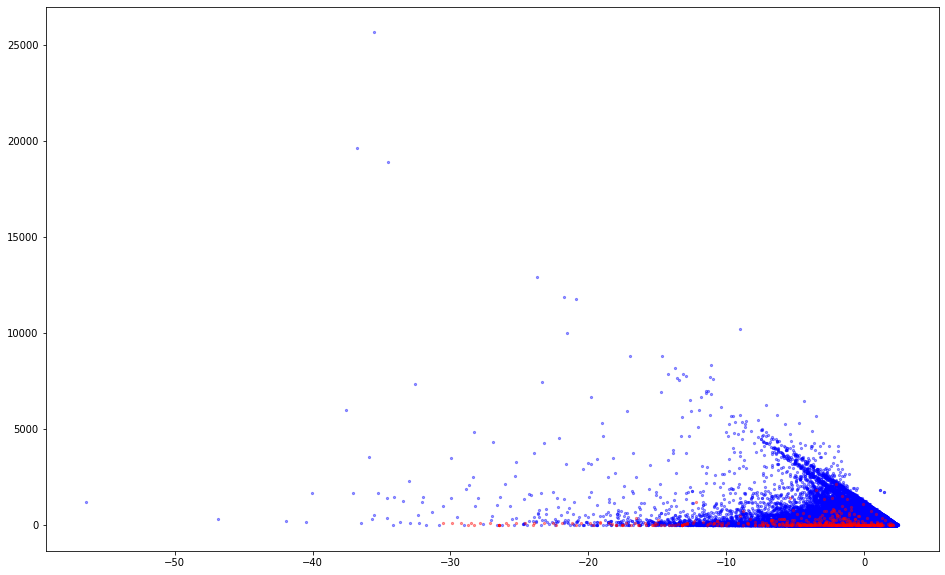

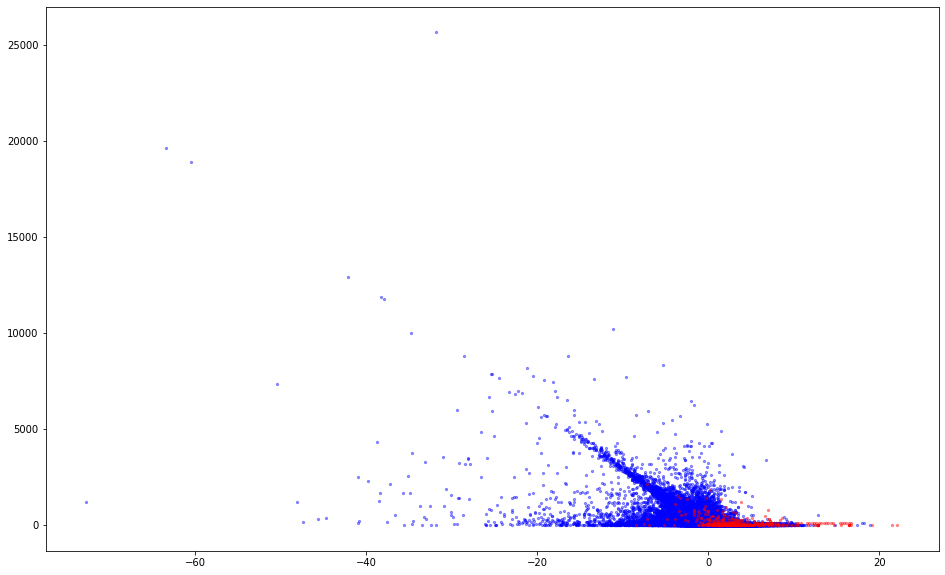

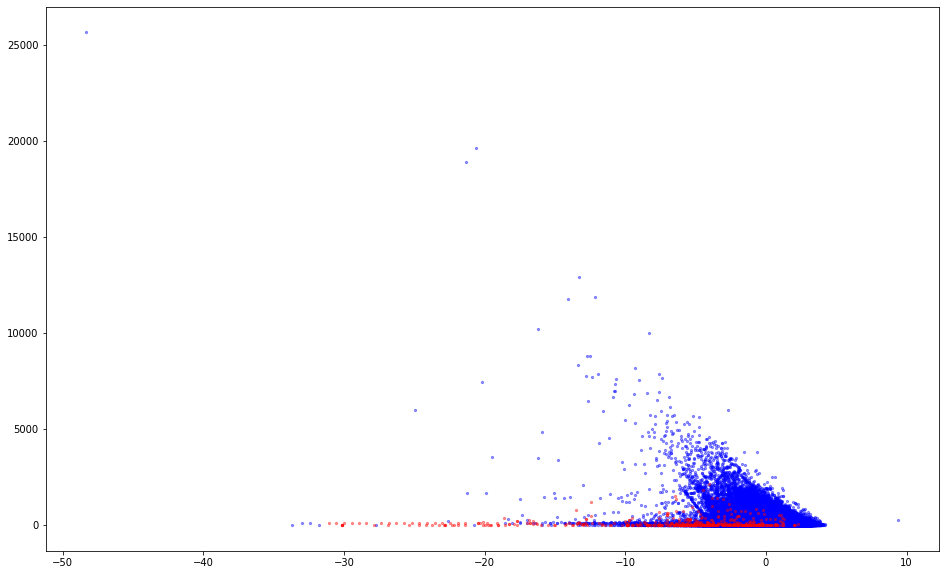

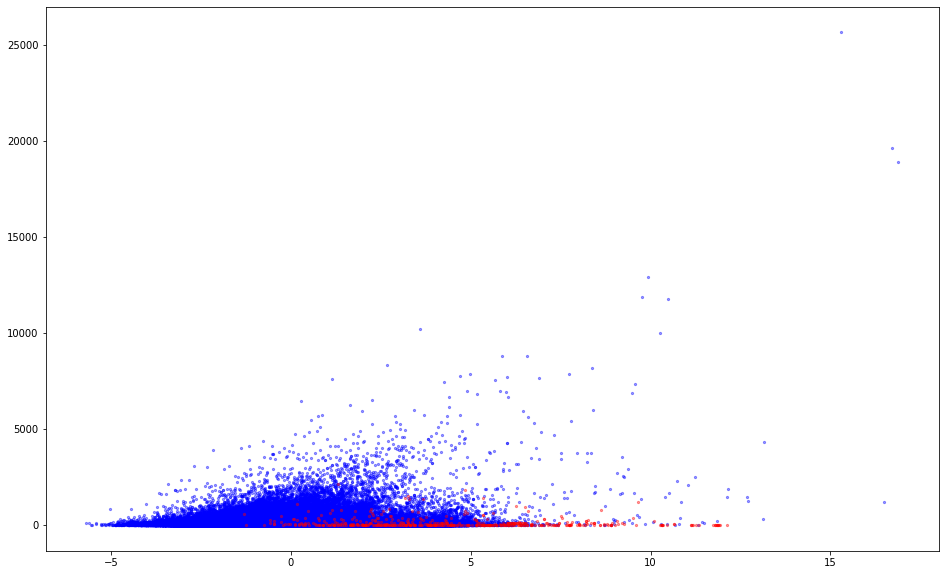

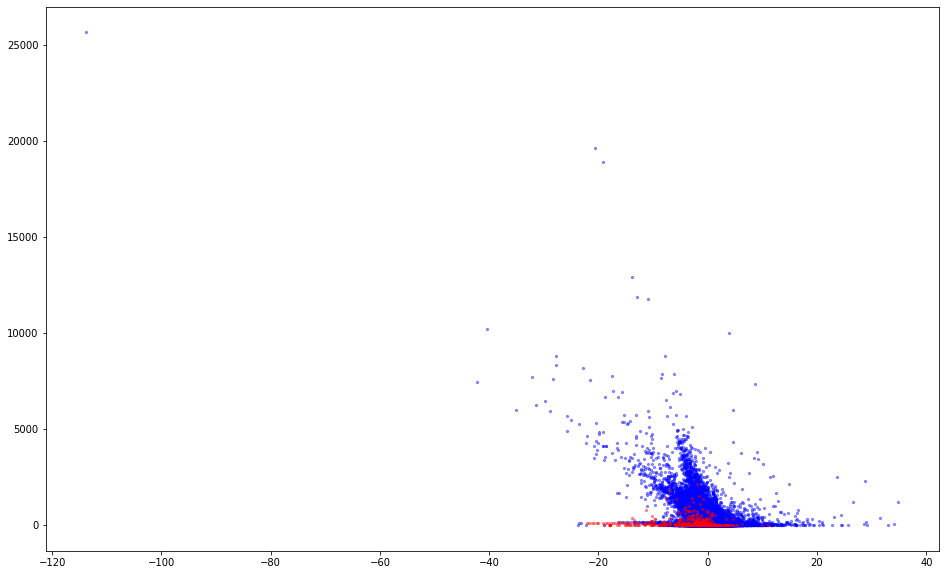

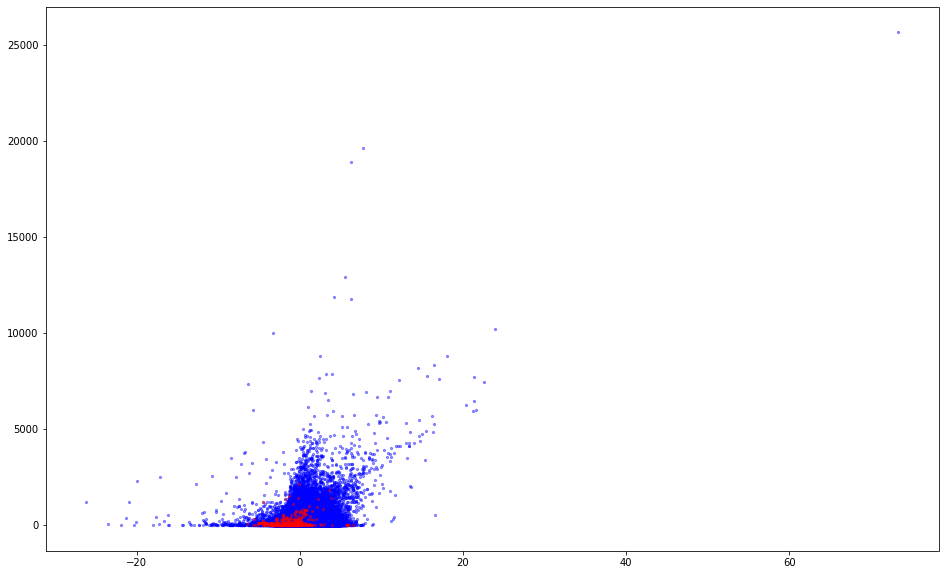

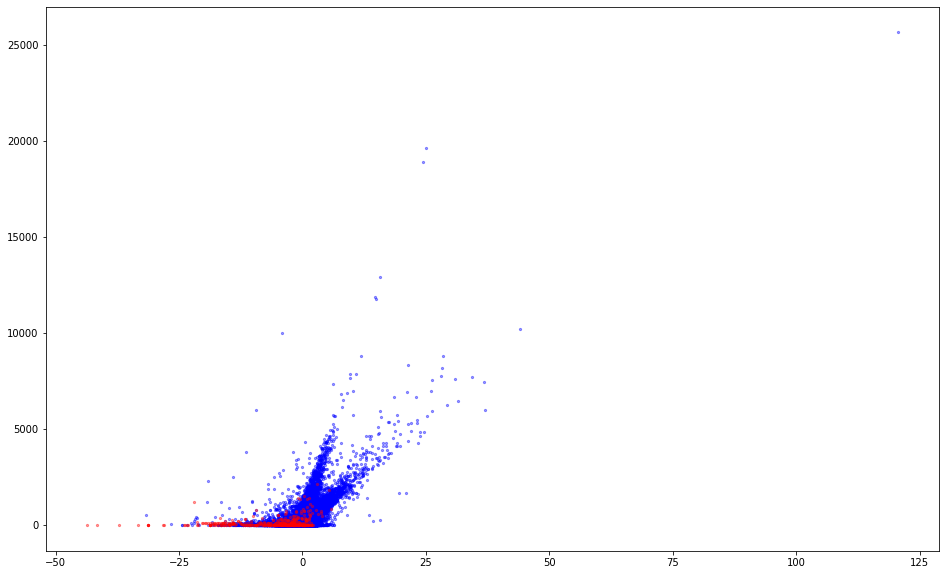

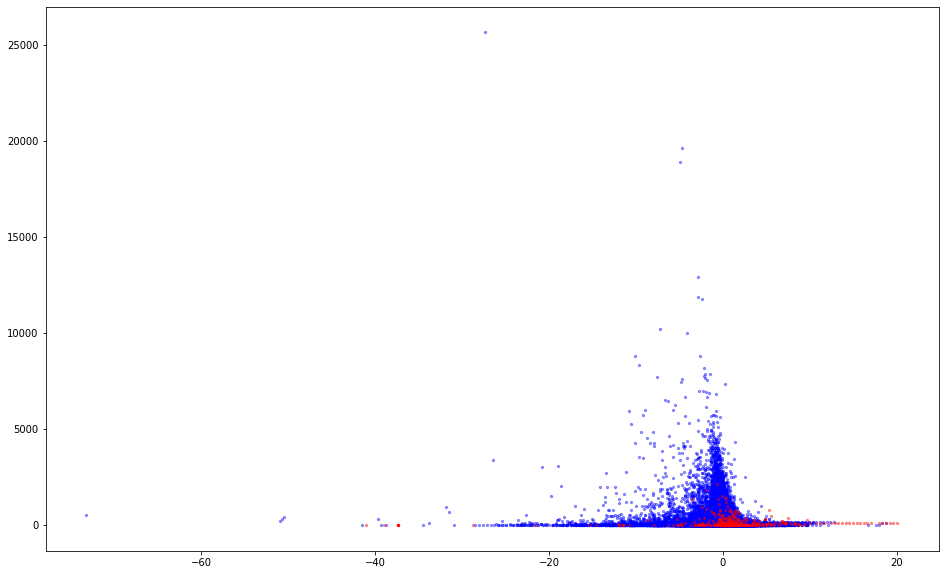

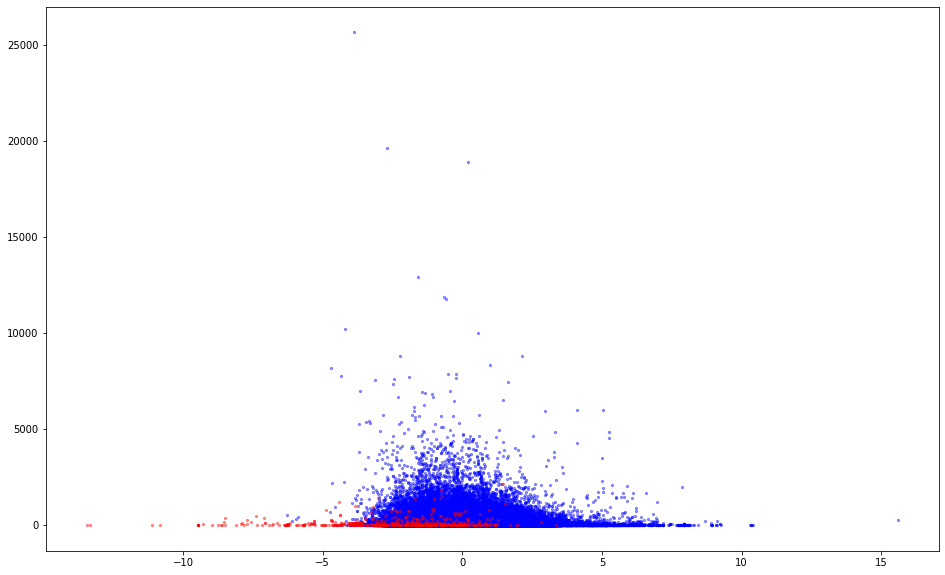

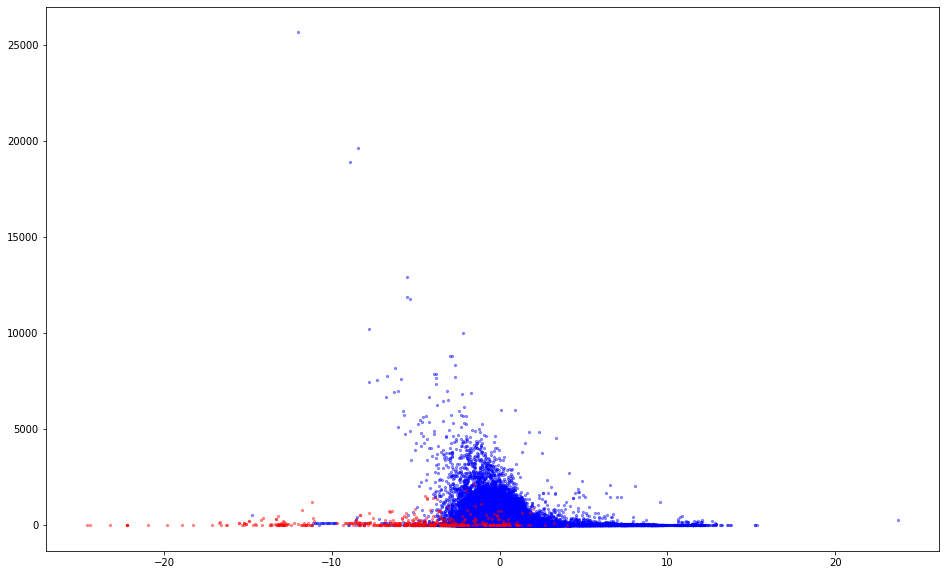

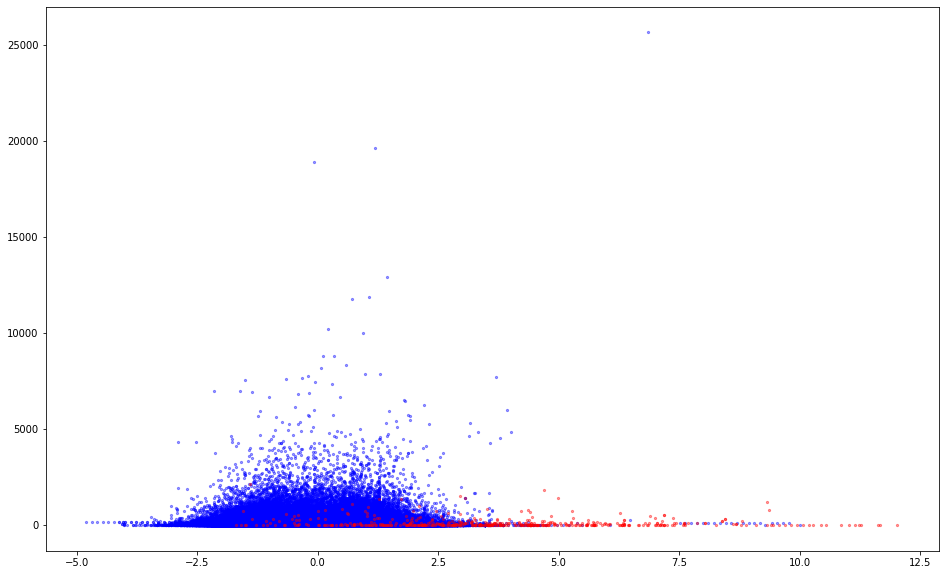

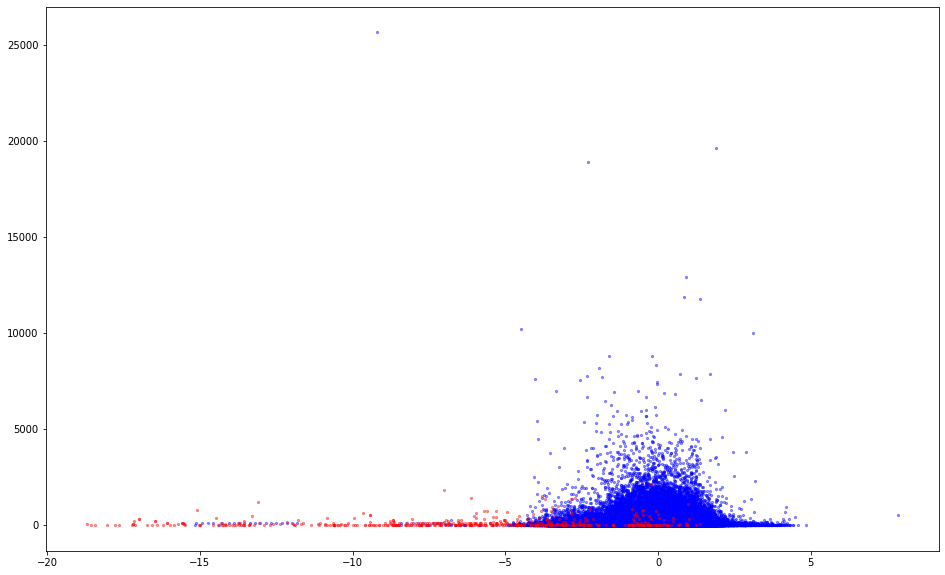

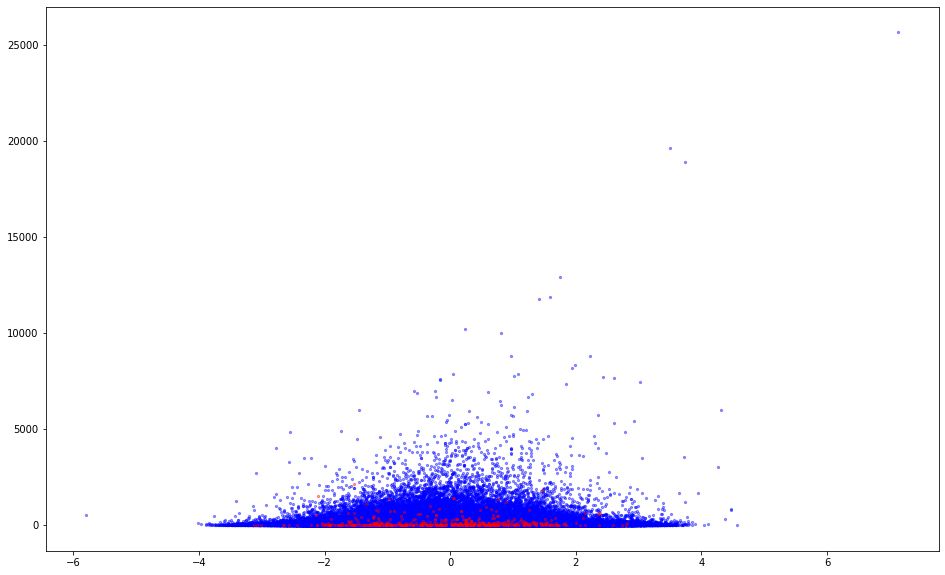

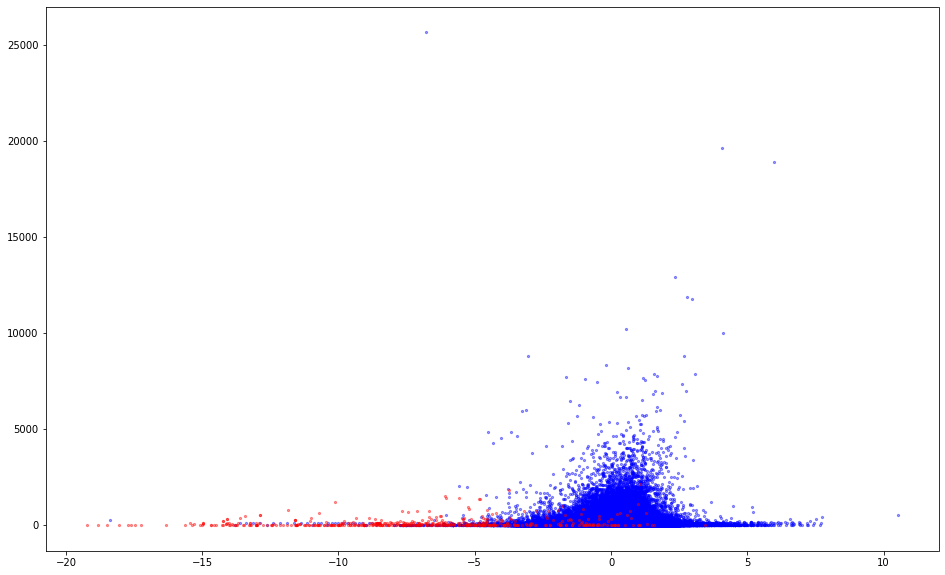

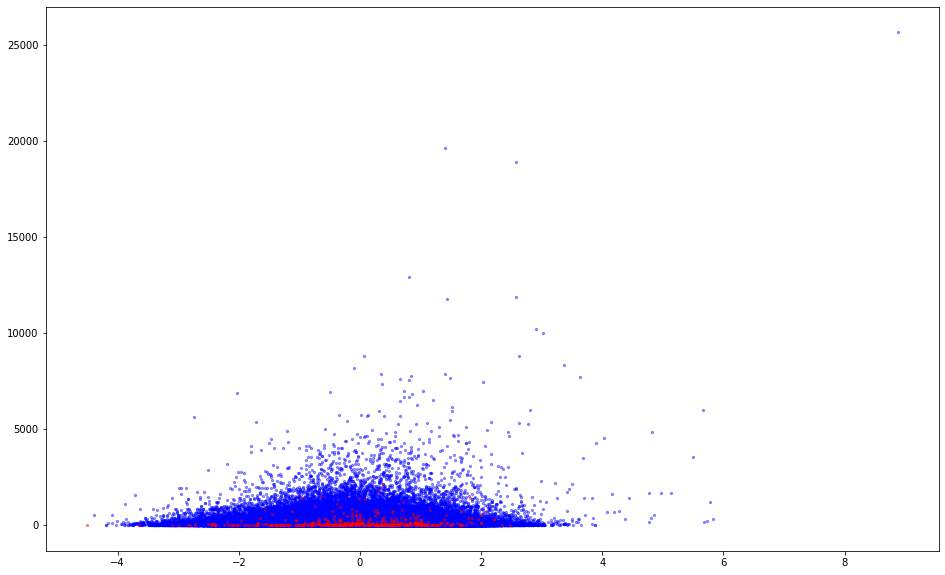

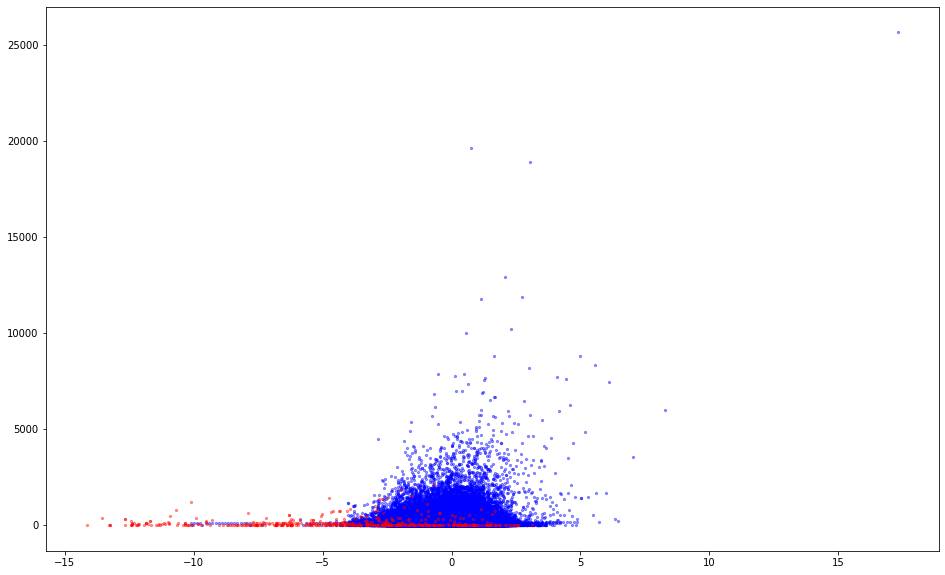

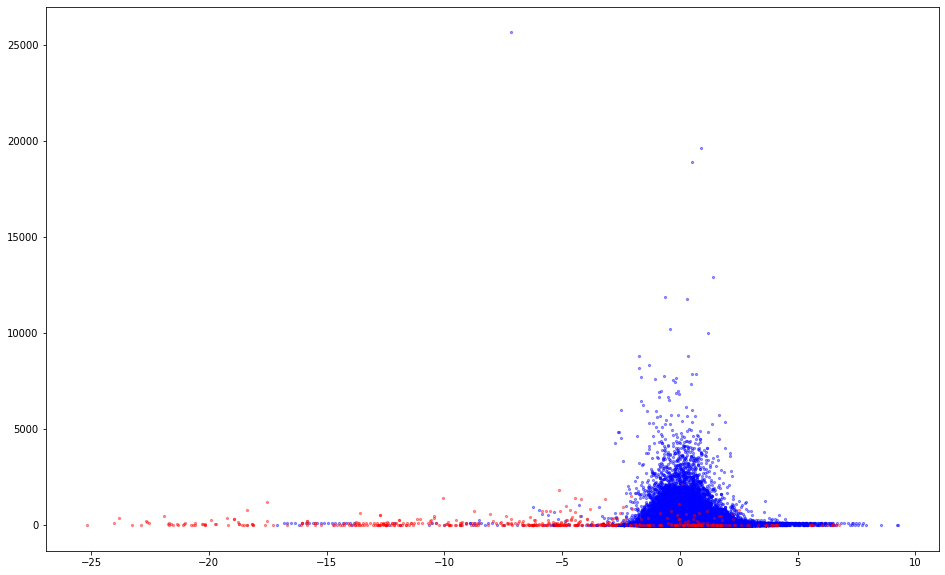

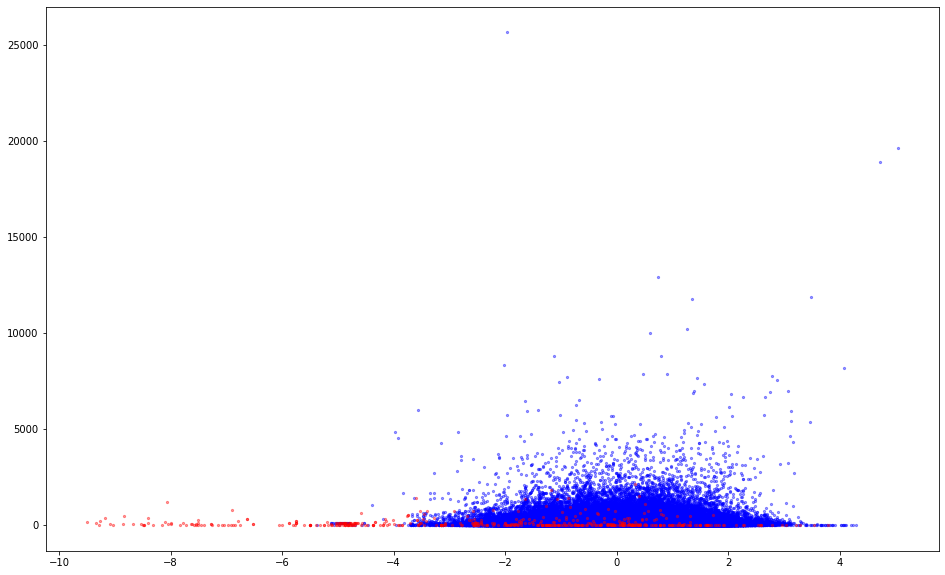

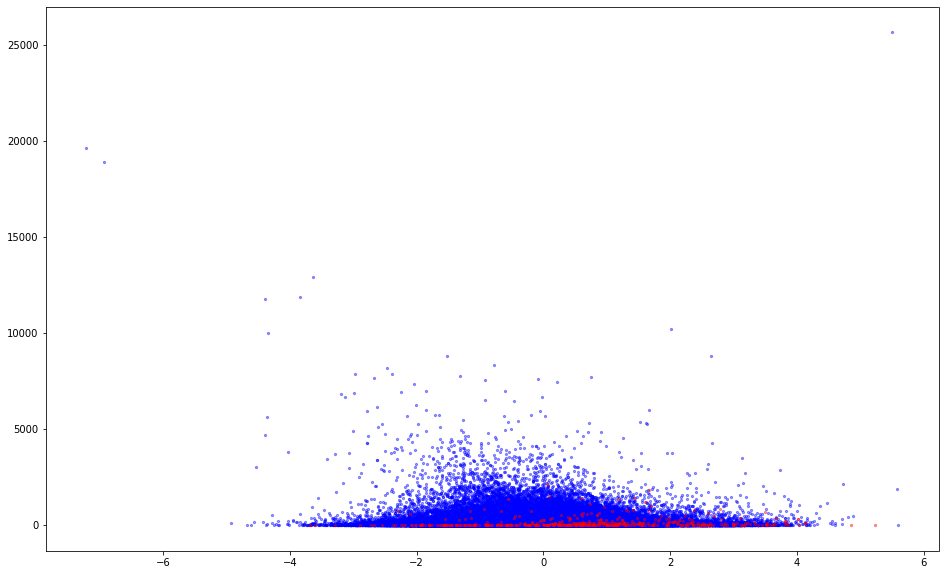

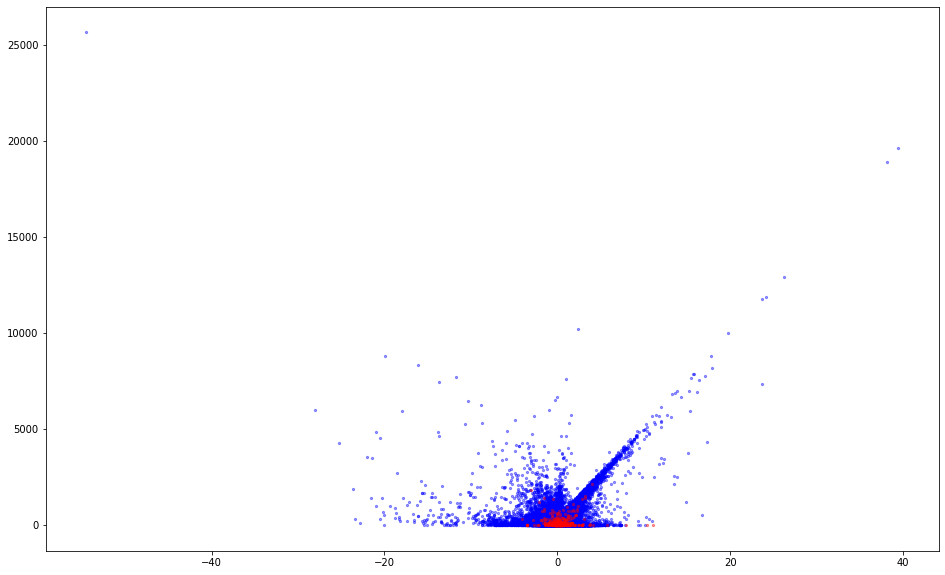

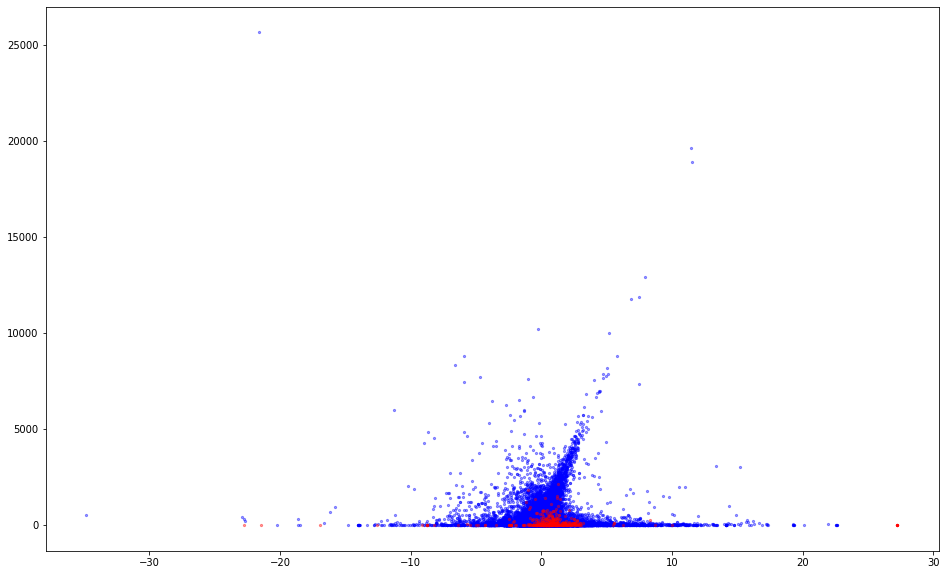

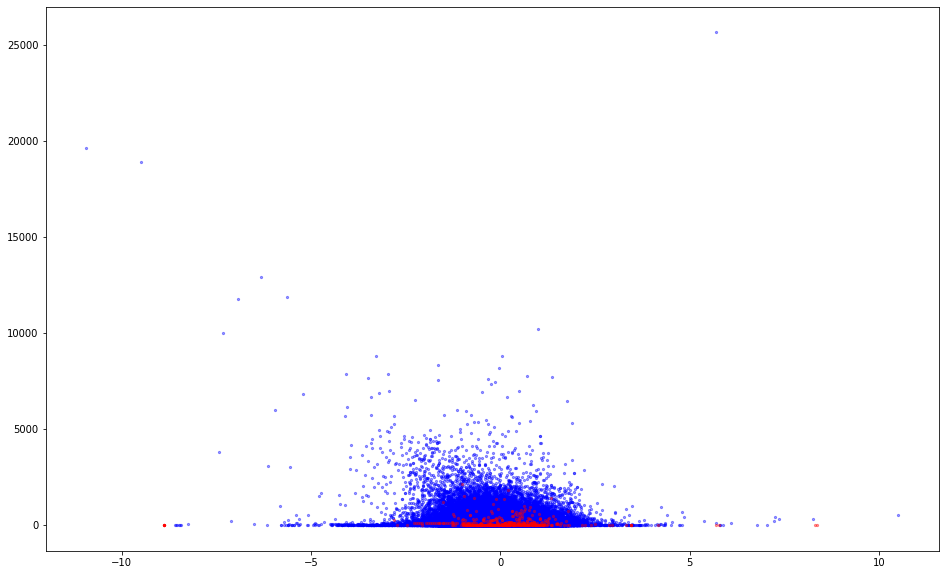

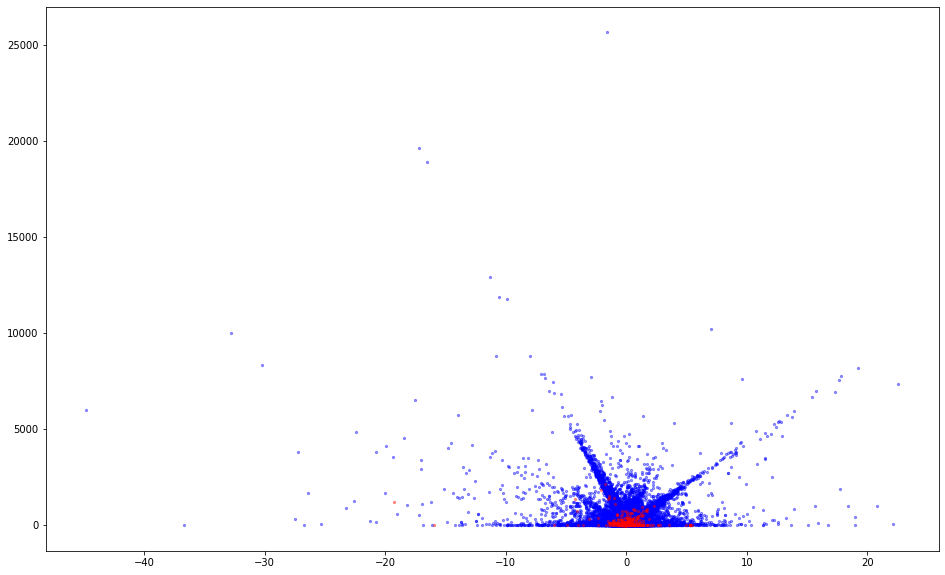

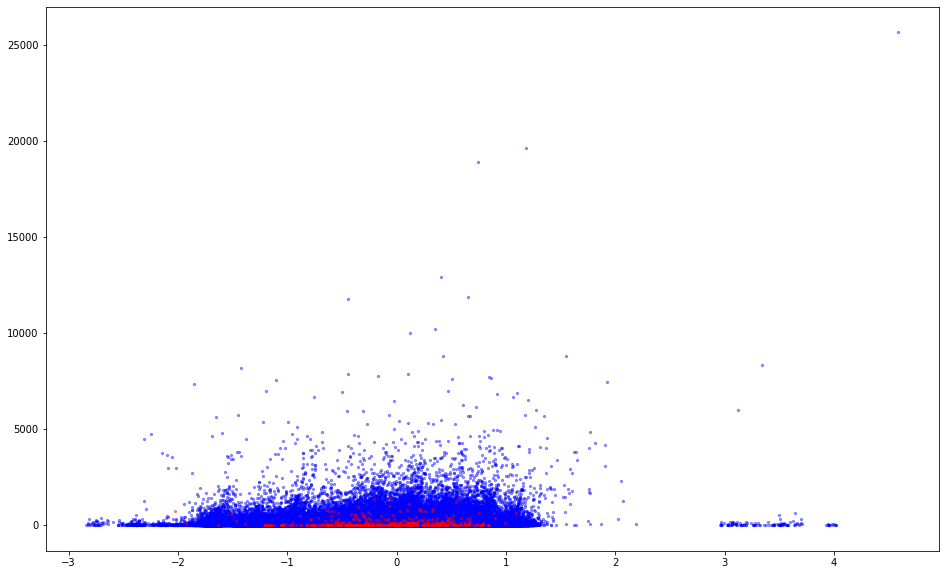

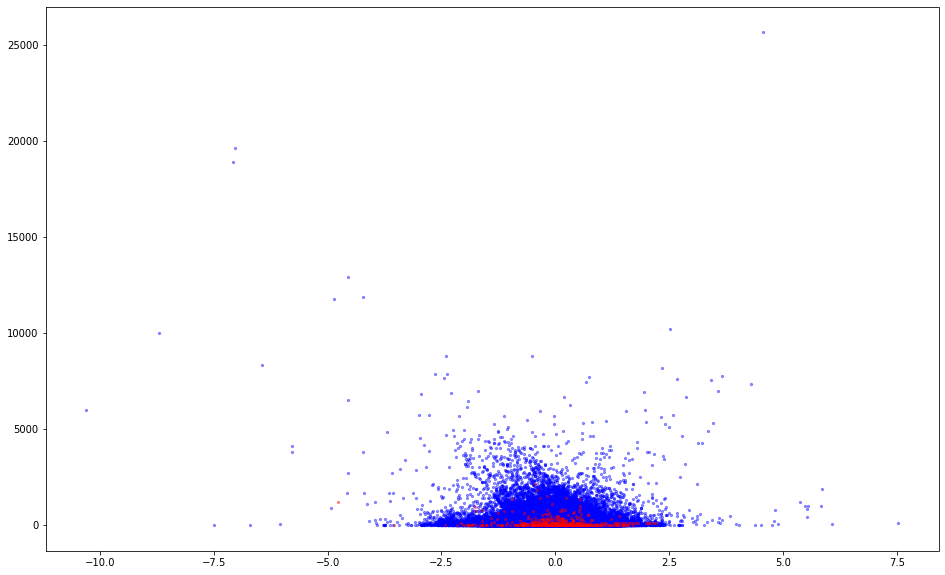

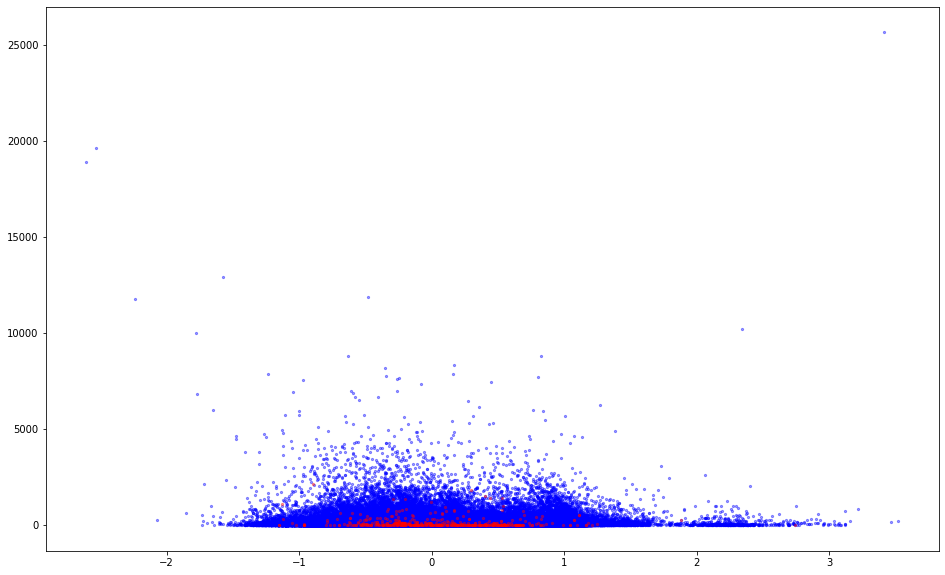

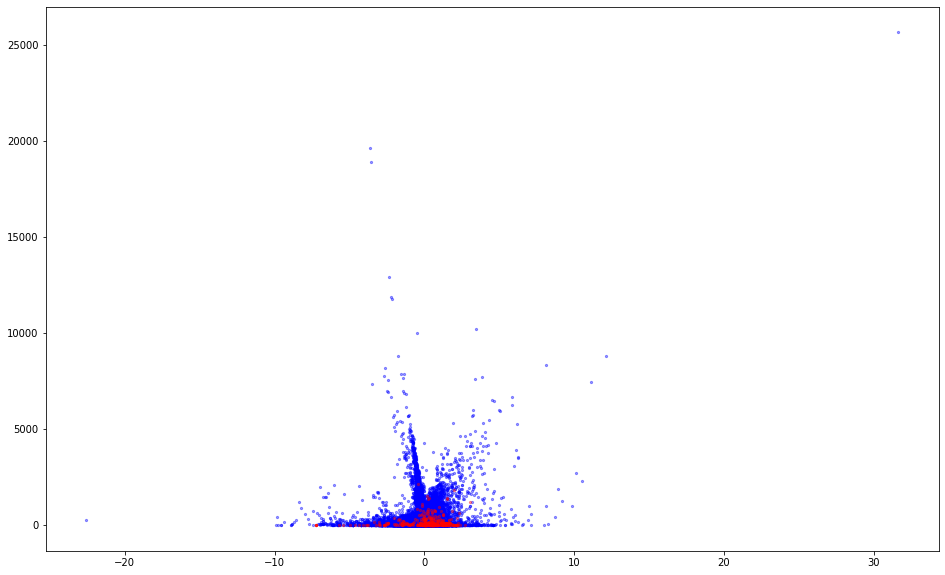

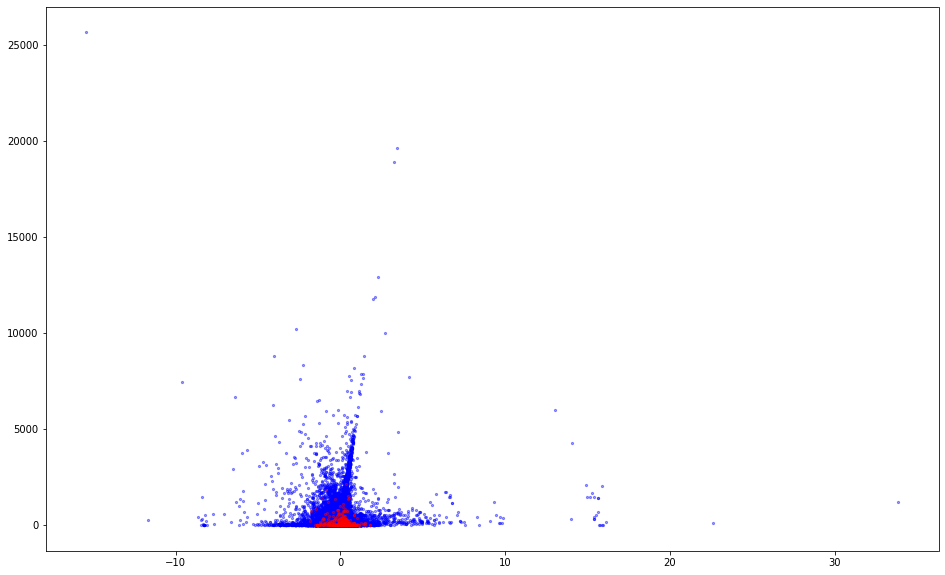

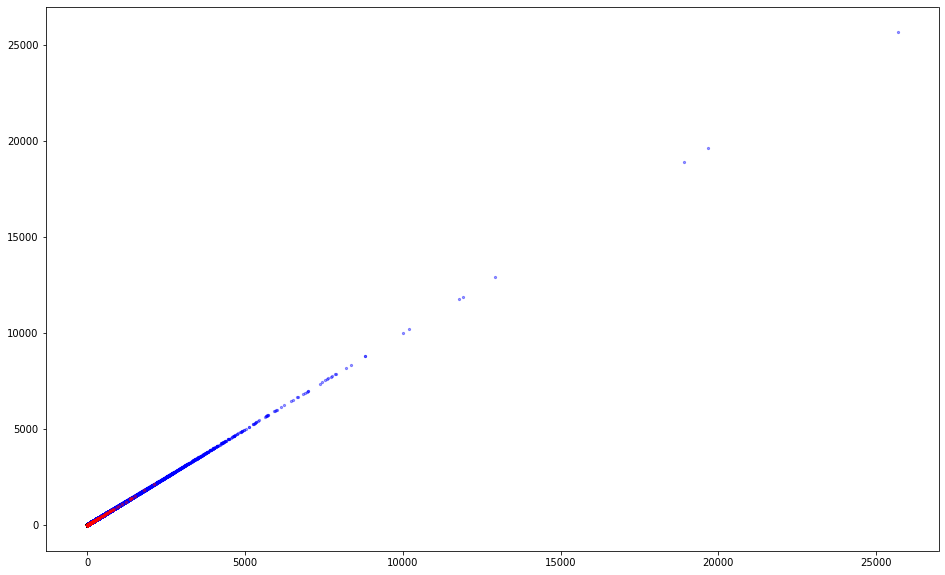

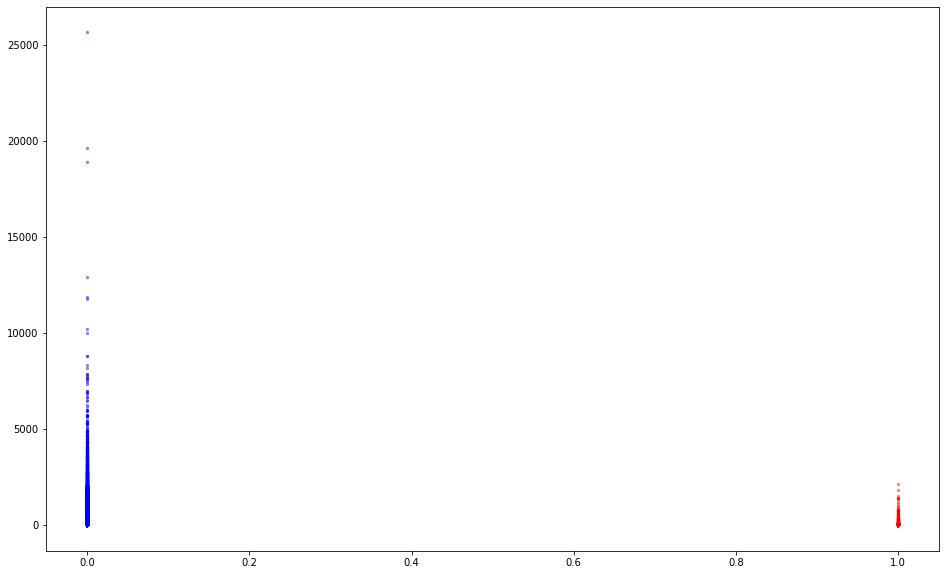

In [27]:
df_clean = df[ df['Class'] == 0 ]
df_fraud = df[ df['Class'] == 1 ]

for i in list(df.columns.values):
    if i != 'Amount' or i != 'Class':
        fig = plt.figure(figsize=(16,10))
        ax1 = fig.add_subplot(111)
        ax1.scatter(df_clean[i], df_clean['Amount'], s=5, c='b', alpha=.4)
        ax1.scatter(df_fraud[i], df_fraud['Amount'], s=5, c='r', alpha=.4)
        fig.show()

In [33]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['V10', 'Amount']], df['Class'], test_size=0.2)

clf = SVC(gamma='scale')
clf.fit(X_train, y_train)

print(clf.score(X_test, y_test))

0.998156665847407
